In [231]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [305]:
bg = cv2.imread("pct/cropblank.png", cv2.IMREAD_COLOR)
taj = cv2.imread("taj0039.png", cv2.IMREAD_COLOR)
# taj = cv2.cvtColor(taj, cv2.COLOR_RGB2GRAY)

In [337]:
def get_corr(img, n):
    fg = cv2.imread("pct/crop{:03d}.png".format(n), cv2.IMREAD_COLOR)
    mask = cv2.absdiff(bg, fg)
    mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
    _, mask = cv2.threshold(mask, 5, 255, cv2.THRESH_BINARY)
    
    fg_gray = fg # cv2.cvtColor(fg, cv2.COLOR_RGB2GRAY)
    fg_gray = cv2.resize(fg_gray, (0,0), fx=.78, fy=.78)
    mask_rs = cv2.resize(mask, (0, 0), fx=.78, fy=.78)
    tm = cv2.matchTemplate(taj, fg_gray, cv2.TM_CCORR_NORMED) #, mask=mask_rs)
    
    minCorr, maxCorr, minLoc, maxLoc = cv2.minMaxLoc(tm)
    return (maxCorr, maxLoc)

In [338]:
corrslocs = [get_corr(taj, n) for n in range(140)]

In [330]:
corrs, locs = list(zip(*corrslocs))

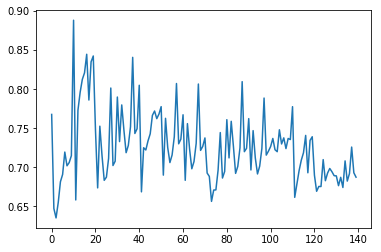

In [331]:
plt.plot(range(140), corrs)

In [334]:
sorted(list(zip(range(100),corrs,locs)),key=lambda a:-a[1])

[(10, 0.8882869482040405, (138, 465)),
 (16, 0.8447223901748657, (138, 464)),
 (19, 0.8425244092941284, (138, 465)),
 (37, 0.840781033039093, (678, 465)),
 (18, 0.8350383639335632, (139, 464)),
 (15, 0.8209284543991089, (138, 464)),
 (14, 0.8125559091567993, (138, 464)),
 (87, 0.8096592426300049, (678, 465)),
 (57, 0.8072798252105713, (677, 465)),
 (67, 0.8066229820251465, (677, 465)),
 (40, 0.8050380349159241, (139, 464)),
 (27, 0.8015039563179016, (677, 465)),
 (13, 0.7958898544311523, (139, 464)),
 (30, 0.7899551391601562, (138, 464)),
 (97, 0.7886695861816406, (678, 465)),
 (17, 0.7861298322677612, (677, 465)),
 (32, 0.7798552513122559, (678, 464)),
 (50, 0.7776732444763184, (138, 465)),
 (12, 0.773029088973999, (138, 465)),
 (47, 0.7720698714256287, (677, 465)),
 (49, 0.7681200504302979, (139, 464)),
 (0, 0.7676868438720703, (138, 464)),
 (60, 0.7672540545463562, (138, 464)),
 (46, 0.7664648294448853, (139, 464)),
 (52, 0.7627102136611938, (677, 464)),
 (90, 0.762333333492279, (13